In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.ticker import MultipleLocator
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
df = pd.read_csv('data/lending_club_loan_two.csv')

In [3]:
df.shape

(396030, 27)

In [4]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

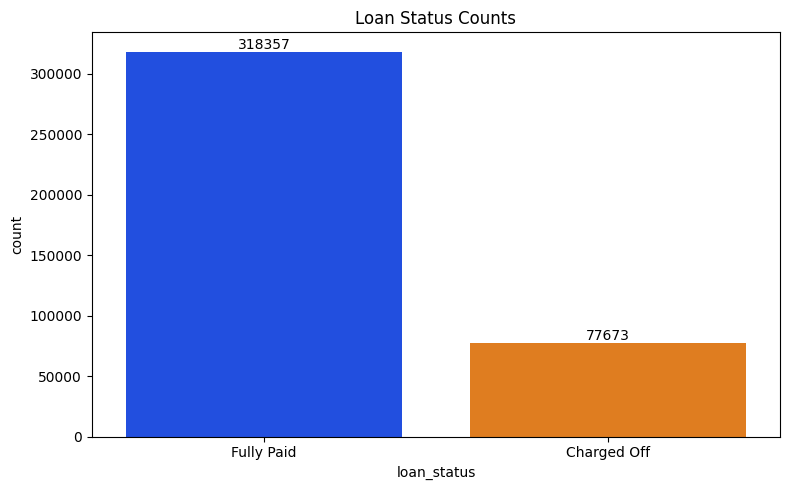

In [8]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='loan_status', hue='loan_status', palette='bright')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Loan Status Counts')
plt.tight_layout()
plt.show()


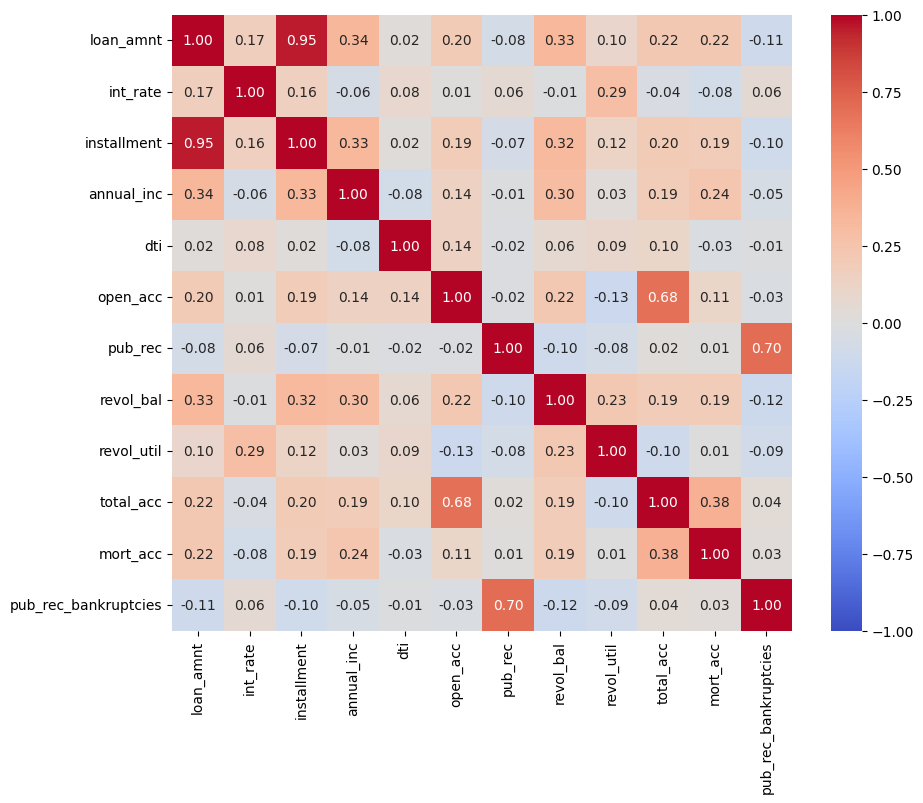

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm')
plt.show()

| Pair of variables                 | Correlation (r) | What it means                                                                               |
| --------------------------------- | --------------- | ------------------------------------------------------------------------------------------- |
| **loan\_amnt ↔ installment**      | **+0.95**       | Almost perfect positive correlation.  Larger loans → larger monthly payments.               |
| loan\_amnt ↔ annual\_inc          | +0.34           | Moderate positive.  Higher‑income applicants tend to take out larger loans.                 |
| installment ↔ annual\_inc         | +0.33           | Same story: higher income → bigger installment amounts.                                     |
| revol\_bal ↔ installment          | +0.32           | Borrowers with high outstanding balances also tend to have larger loans/payments.           |
| revol\_bal ↔ annual\_inc          | +0.30           | Modest: wealthier people often carry higher revolving balances.                             |
| int\_rate ↔ revol\_util           | +0.29           | Moderate: higher credit‑utilization → somewhat higher interest rates.                       |
| total\_acc ↔ open\_acc            | +0.68           | Strong: people with more total accounts naturally have more open accounts.                  |
| total\_acc ↔ mort\_acc            | +0.38           | Moderate: more mortgage accounts tend to go along with a higher total account count.        |
| pub\_rec\_bankruptcies ↔ pub\_rec | +0.70           | Strong: more public records (e.g. bankruptcies) associated with more public‐record entries. |


All other pairwise correlations fall below about |0.3|, meaning those relationships are fairly weak or negligible:

- Almost zero correlations (|r|<0.1) include things like dti vs. most variables, or int_rate vs. loan_amnt (r≈0.17).

- Slight negative correlations appear too—e.g. pub_rec_bankruptcies vs. loan_amnt (r≈−0.11): borrowers with bankruptcy records tend to take out slightly smaller loans.

##### Key takeaways
1. Loan size & payments
The two largest correlations in your matrix are trivial (a variable with itself) and the one between loan_amnt and installment (r≈0.95)—but that’s expected since installments are derived from the loan amount.

2. Income effects
Annual income shows a modest positive relationship (r≈0.3) with both loan size and revolving balance. In short, higher‐earning borrowers tend to both borrow and revolve more.

3. Credit‐usage & rates
There’s a noticeable correlation (r≈0.29) between revol_util (utilization rate) and int_rate, suggesting lenders charge higher rates to those using a larger share of their available credit.

4. Account counts
As you’d expect, the number of open accounts, total accounts, and mortgage accounts all hang together (r≈0.4–0.7).

5. Weak/insignificant links
Many of the other pairings are under |0.2|, indicating very weak linear relationships. For example, debt‑to‑income ratio (dti) doesn’t line up strongly with any of your other numeric predictors.

`Bottom line`: aside from the mechanical link between loan amount and installment, correlations in your dataset are generally modest, with most |r| < 0.5. That suggests you won’t run into extreme multicollinearity (outside of the loan/installment pair), but you may still want to watch out for the “account count” cluster (open_acc/total_acc/mort_acc) and for revolving‐utilization vs. interest rate when building predictive models.

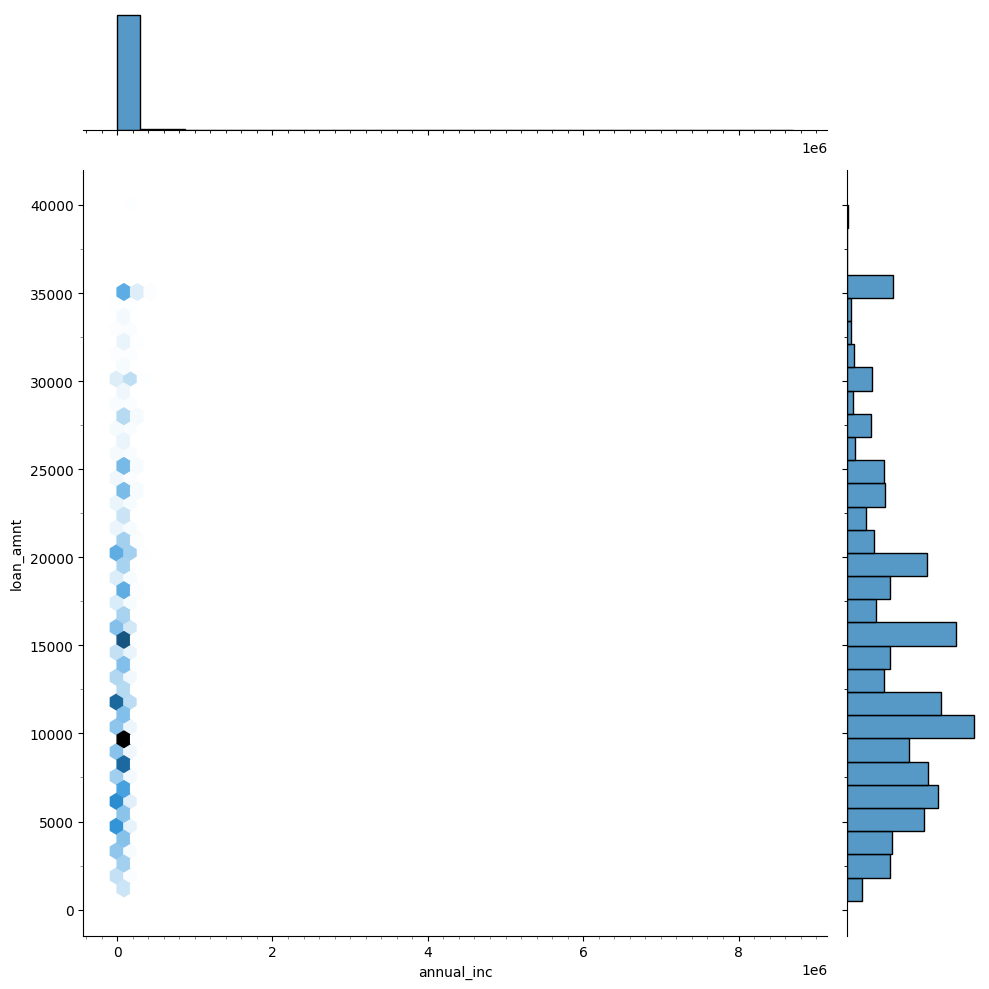

In [10]:
g = sns.jointplot(
    x='annual_inc',
    y='loan_amnt',
    data=df,
    kind='hex',
    marginal_kws=dict(bins=30, fill=True),
    height=10,
    ratio= 5
)

g.ax_joint.xaxis.set_minor_locator(MultipleLocator(200000))
g.ax_joint.yaxis.set_minor_locator(MultipleLocator(2500))
g.ax_joint.tick_params(which='minor', length=2, color='gray')




plt.tight_layout()
plt.show()

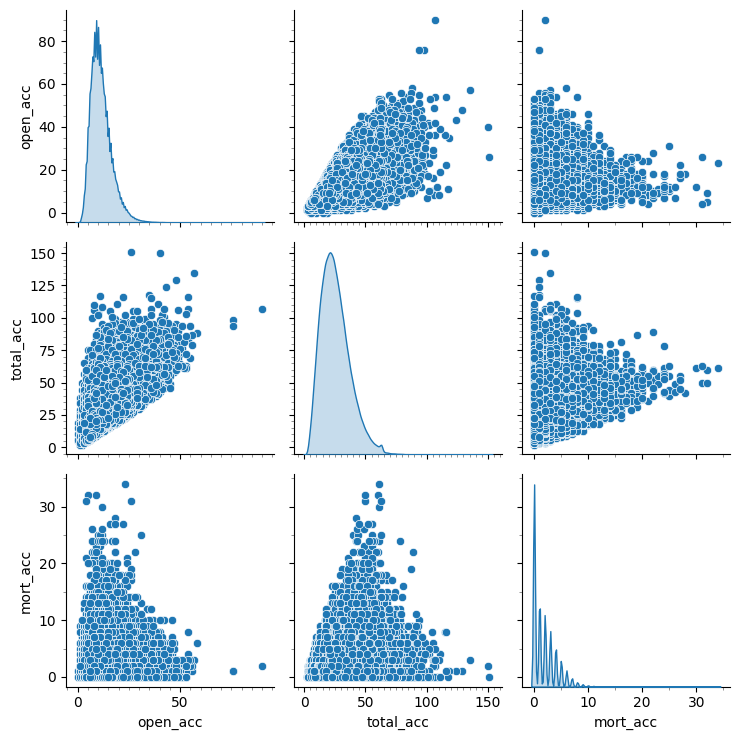

In [11]:

g = sns.pairplot(
    df[['open_acc','total_acc','mort_acc']],
    kind='scatter',
    diag_kind='kde'
)

for ax in g.axes.flat:
    ax.xaxis.set_minor_locator(MultipleLocator(5))

    ax.yaxis.set_minor_locator(MultipleLocator(5))

    ax.tick_params(which='minor', length=2, color='gray')


plt.tight_layout()
plt.show()

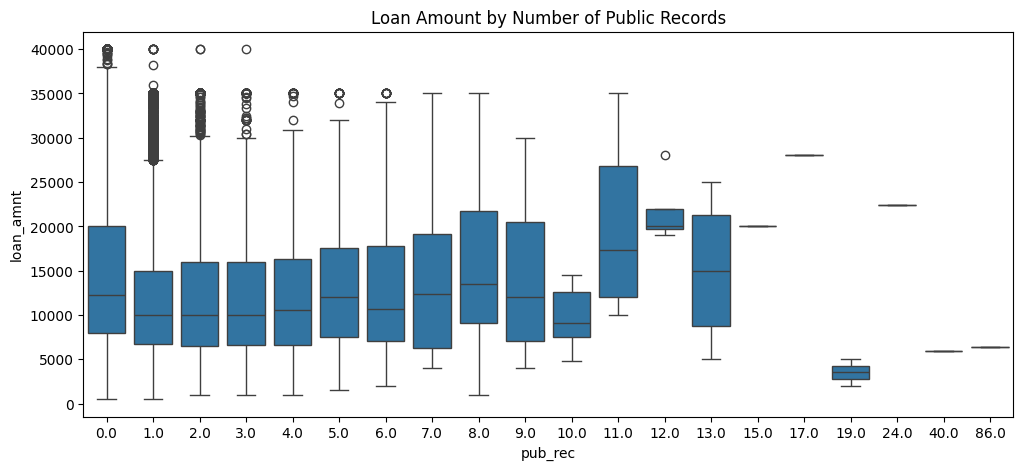

In [12]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='pub_rec', y='loan_amnt', data=df)
plt.title('Loan Amount by Number of Public Records')

plt.show()

   pub_rec   int_rate
0      0.0  13.512308
1      1.0  14.320031
2      2.0  14.790765
3      3.0  14.741801
4      4.0  14.984307


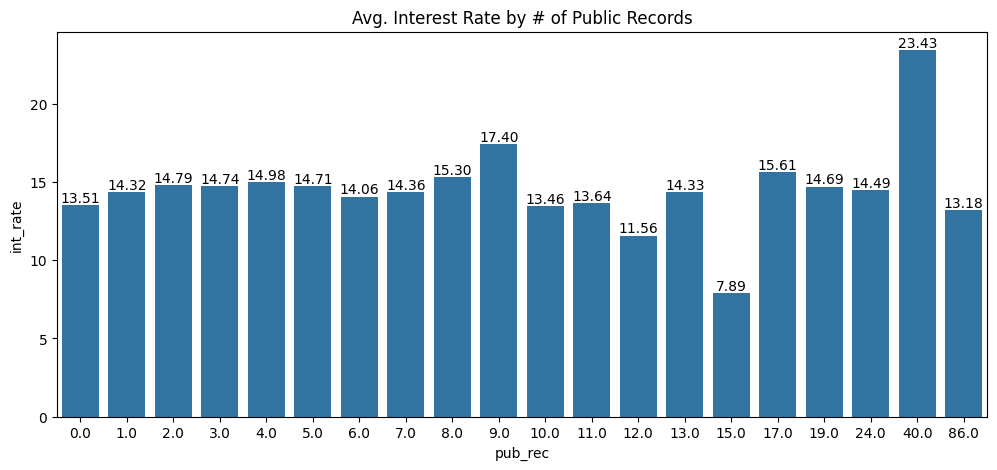

In [13]:
plt.figure(figsize=(12,5))
avg_int_rate_by_pub_rec = df.groupby('pub_rec')['int_rate'].mean().reset_index()
print(avg_int_rate_by_pub_rec.head())
ax = sns.barplot(data=avg_int_rate_by_pub_rec, x='pub_rec', y='int_rate')
plt.title('Avg. Interest Rate by # of Public Records')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge')

plt.show()

Text(0, 0.5, 'Installment')

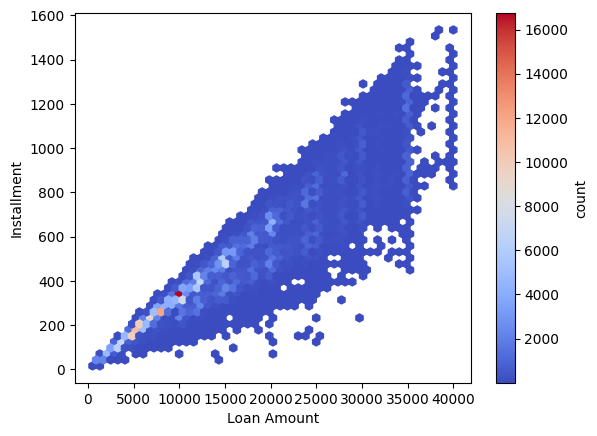

In [14]:

plt.hexbin(df.loan_amnt, df.installment, gridsize=50, mincnt=1, cmap='coolwarm')
plt.colorbar(label='count')
plt.xlabel('Loan Amount'); plt.ylabel('Installment')


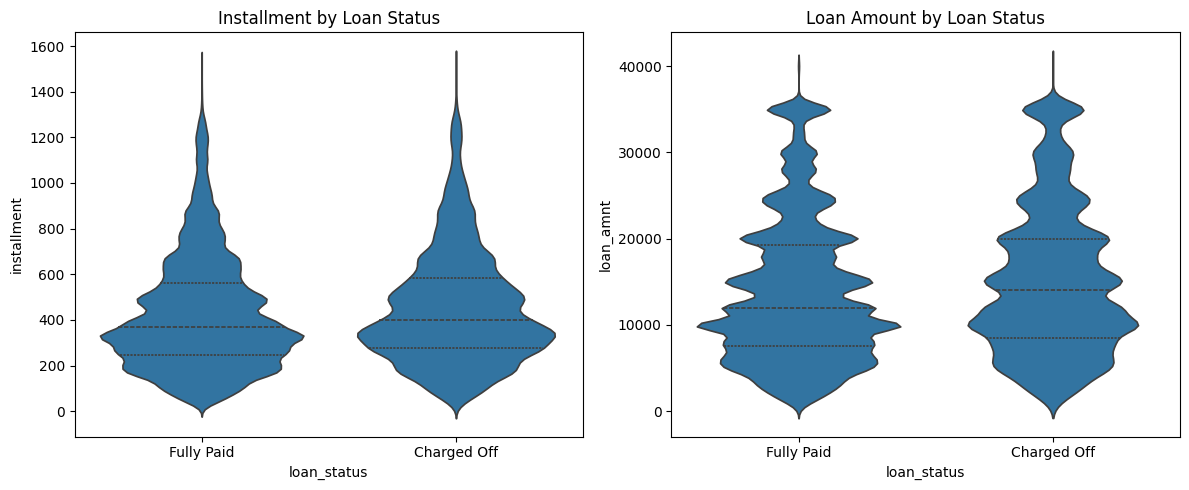

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(x='loan_status', y='installment', data=df, inner='quartile', ax=axes[0])
axes[0].set_title('Installment by Loan Status')

sns.violinplot(x='loan_status', y='loan_amnt', data=df, inner='quartile', ax=axes[1])
axes[1].set_title('Loan Amount by Loan Status')

plt.tight_layout()
plt.show()


In [16]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [17]:
print(f"Grade Unique: {df['grade'].unique()}")
print(f"Sub Grade Unique: {df['sub_grade'].unique()}")

Grade Unique: ['B' 'A' 'C' 'E' 'D' 'F' 'G']
Sub Grade Unique: ['B4' 'B5' 'B3' 'A2' 'C5' 'C3' 'A1' 'B2' 'C1' 'A5' 'E4' 'A4' 'A3' 'D1'
 'C2' 'B1' 'D3' 'D5' 'D2' 'E1' 'E2' 'E5' 'F4' 'E3' 'D4' 'G1' 'F5' 'G2'
 'C4' 'F1' 'F3' 'G5' 'G4' 'F2' 'G3']


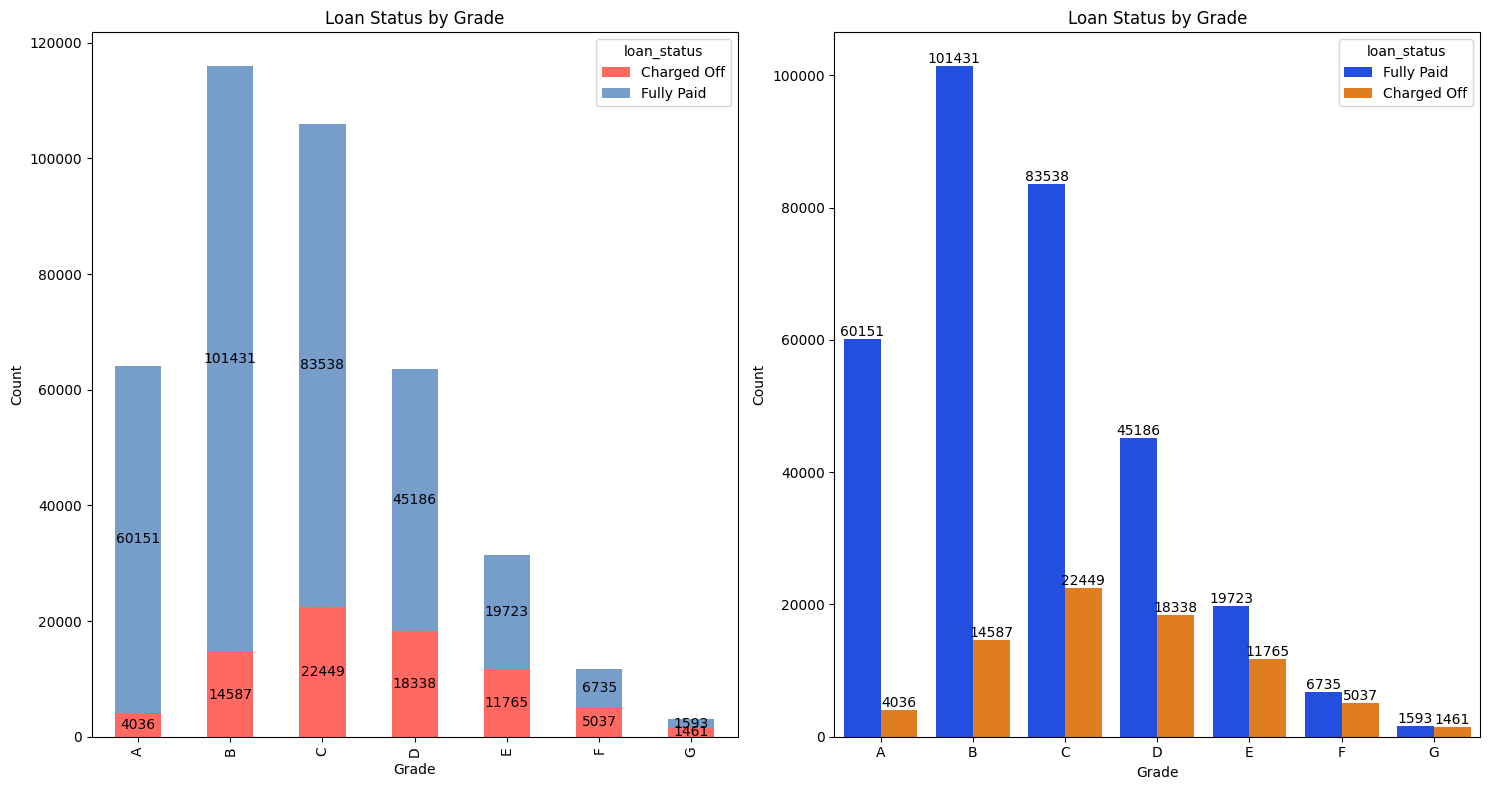

In [18]:
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

df['grade'] = pd.Categorical(df['grade'], categories=grade_order, ordered=True)

counts = pd.crosstab(df['grade'], df['loan_status'])

fig, ax = plt.subplots(1, 2, figsize=(15, 8))

counts.plot(kind='bar', stacked=True, ax=ax[0], color=['#FF6961', '#779ECB'])
ax[0].set_title("Loan Status by Grade")
ax[0].set_xlabel('Grade')
ax[0].set_ylabel('Count')

sns.countplot(data=df, x='grade', hue = 'loan_status', ax=ax[1], palette='bright', order=grade_order)
ax[1].set_title("Loan Status by Grade")
ax[1].set_xlabel('Grade')
ax[1].set_ylabel('Count')

for container in ax[0].containers:
    ax[0].bar_label(container, fmt="%d", label_type='center')

for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type='edge')

plt.tight_layout()
plt.show()

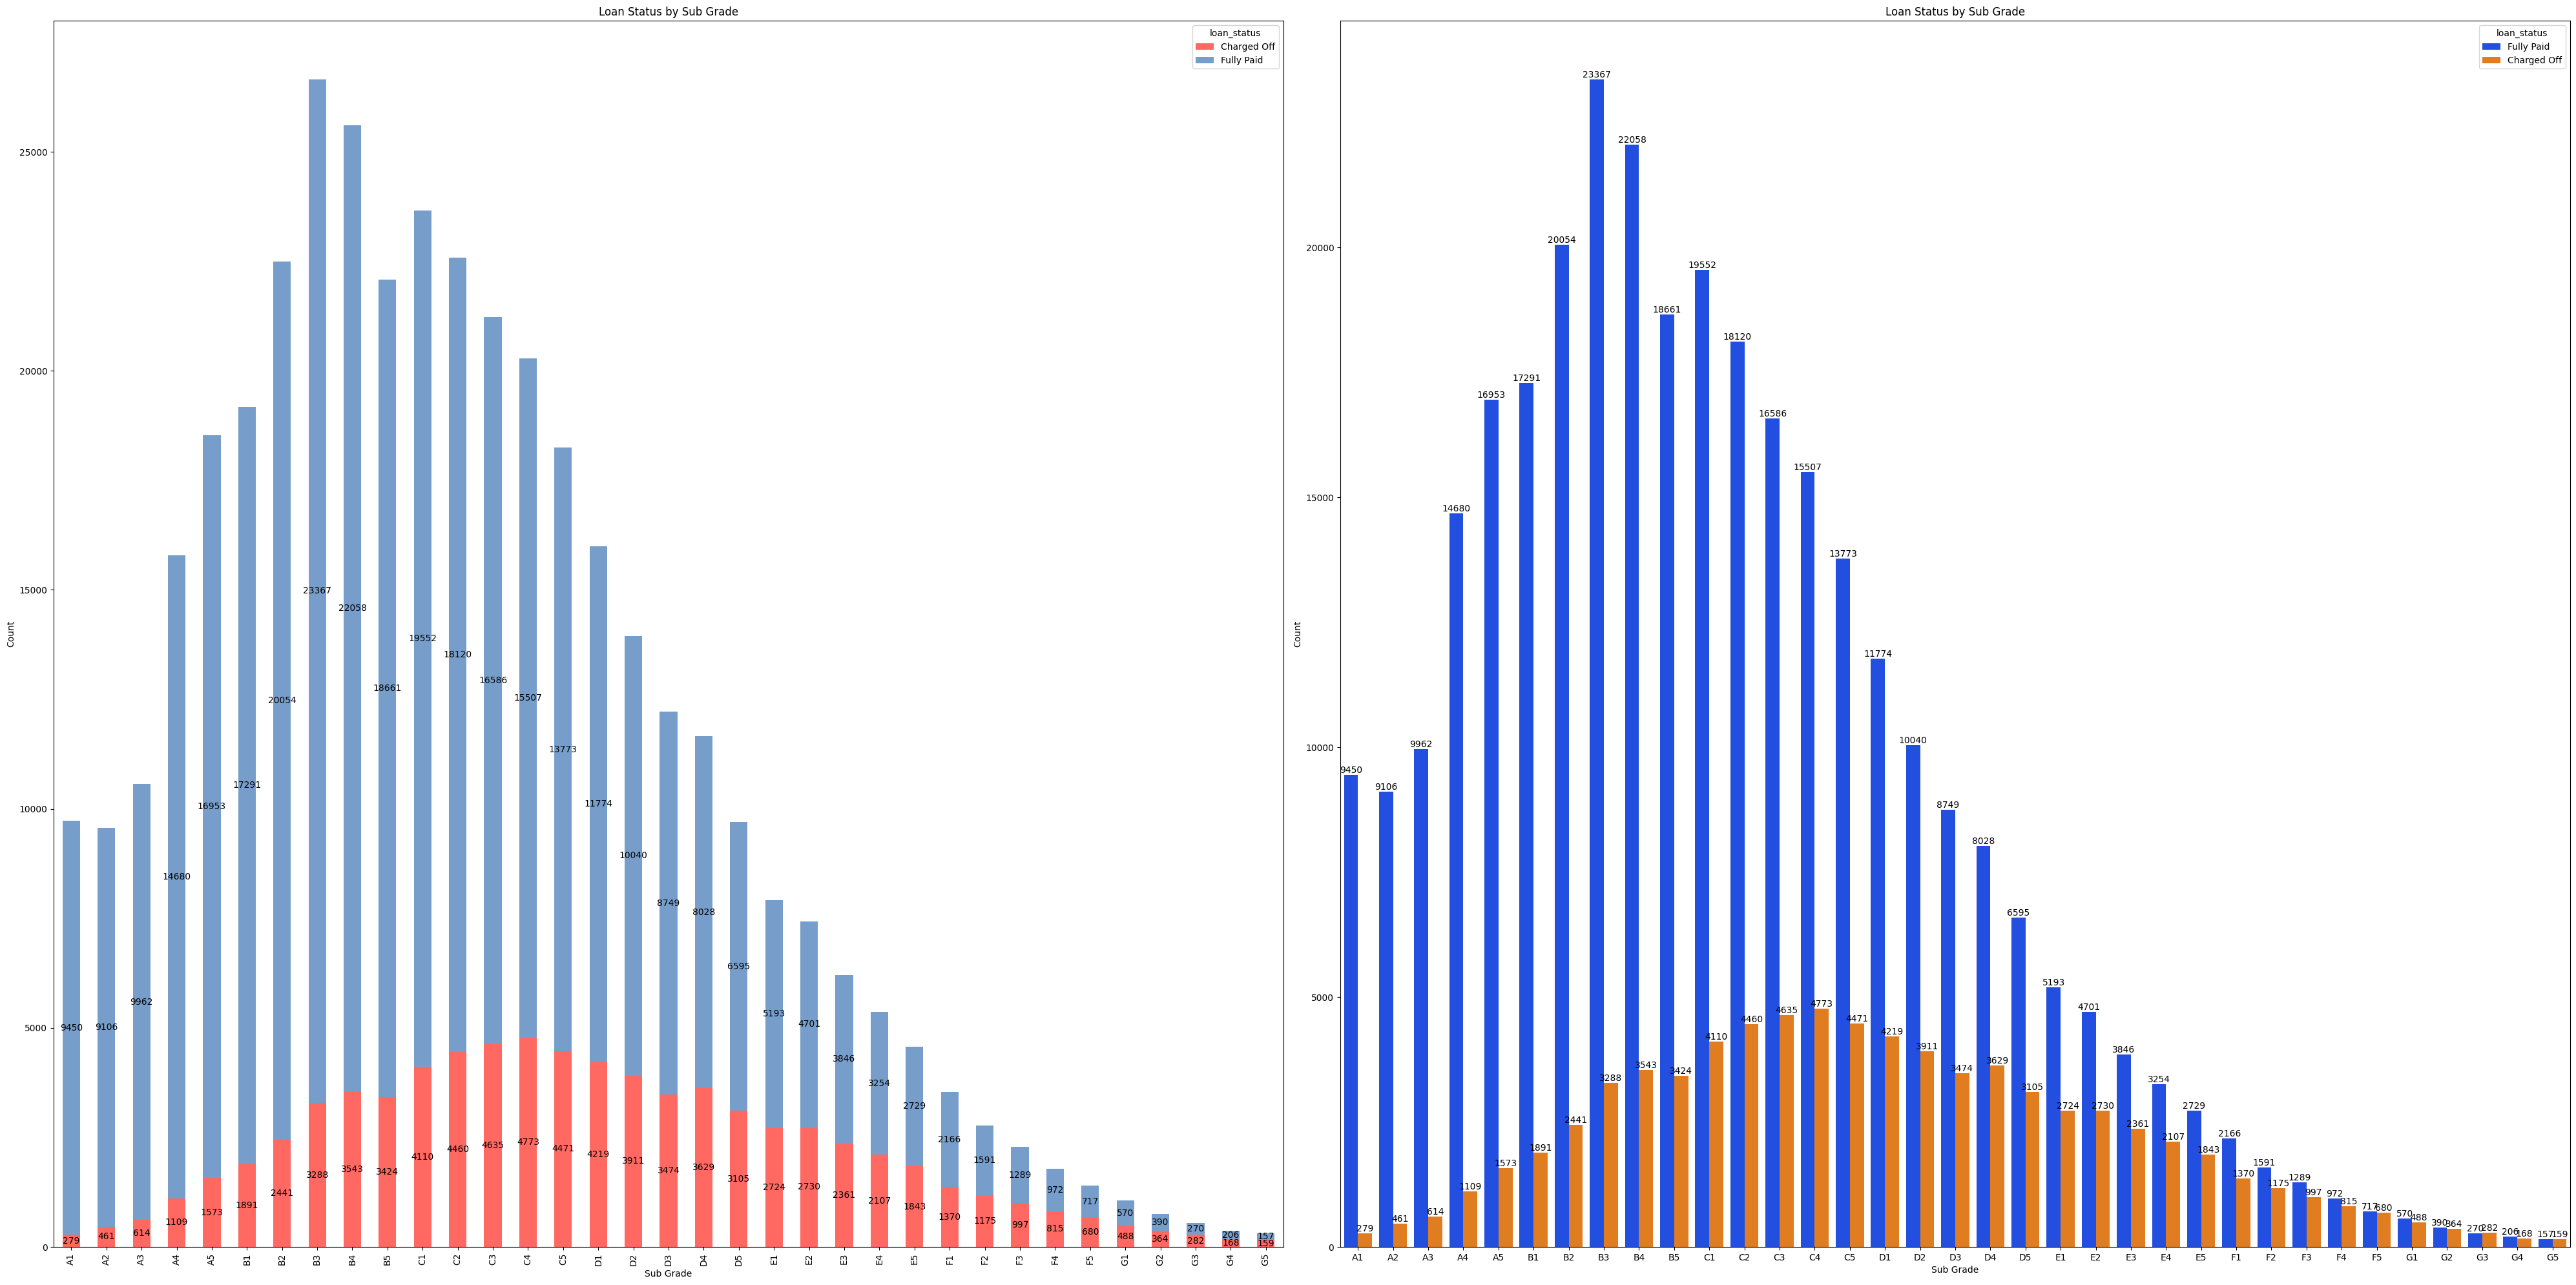

In [19]:
sub_grade_order = ['A1', 'A2', 'A3', 'A4', 'A5', 
                    'B1', 'B2', 'B3', 'B4', 'B5', 
                    'C1', 'C2', 'C3', 'C4', 'C5', 
                    'D1', 'D2', 'D3', 'D4', 'D5', 
                    'E1', 'E2', 'E3', 'E4', 'E5', 
                    'F1', 'F2', 'F3', 'F4', 'F5', 
                    'G1', 'G2', 'G3', 'G4', 'G5']
df['sub_grade'] = pd.Categorical(df['sub_grade'], categories=sub_grade_order, ordered=True)

counts = pd.crosstab(df['sub_grade'], df['loan_status'])
fig, ax = plt.subplots(1, 2, figsize=(40, 20))

counts.plot(kind='bar', stacked=True, ax=ax[0], color=['#FF6961', '#779ECB'])
ax[0].set_title("Loan Status by Sub Grade")
ax[0].set_xlabel('Sub Grade')
ax[0].set_ylabel('Count')

sns.countplot(data=df, x='sub_grade', hue = 'loan_status', ax=ax[1], palette='bright', order=sub_grade_order)
ax[1].set_title("Loan Status by Sub Grade")
ax[1].set_xlabel('Sub Grade')
ax[1].set_ylabel('Count')


for container in ax[0].containers:
    ax[0].bar_label(container, label_type='center')

for container in ax[1].containers:
    ax[1].bar_label(container, fmt="%d", label_type='edge')

plt.tight_layout()
plt.show()


In [20]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

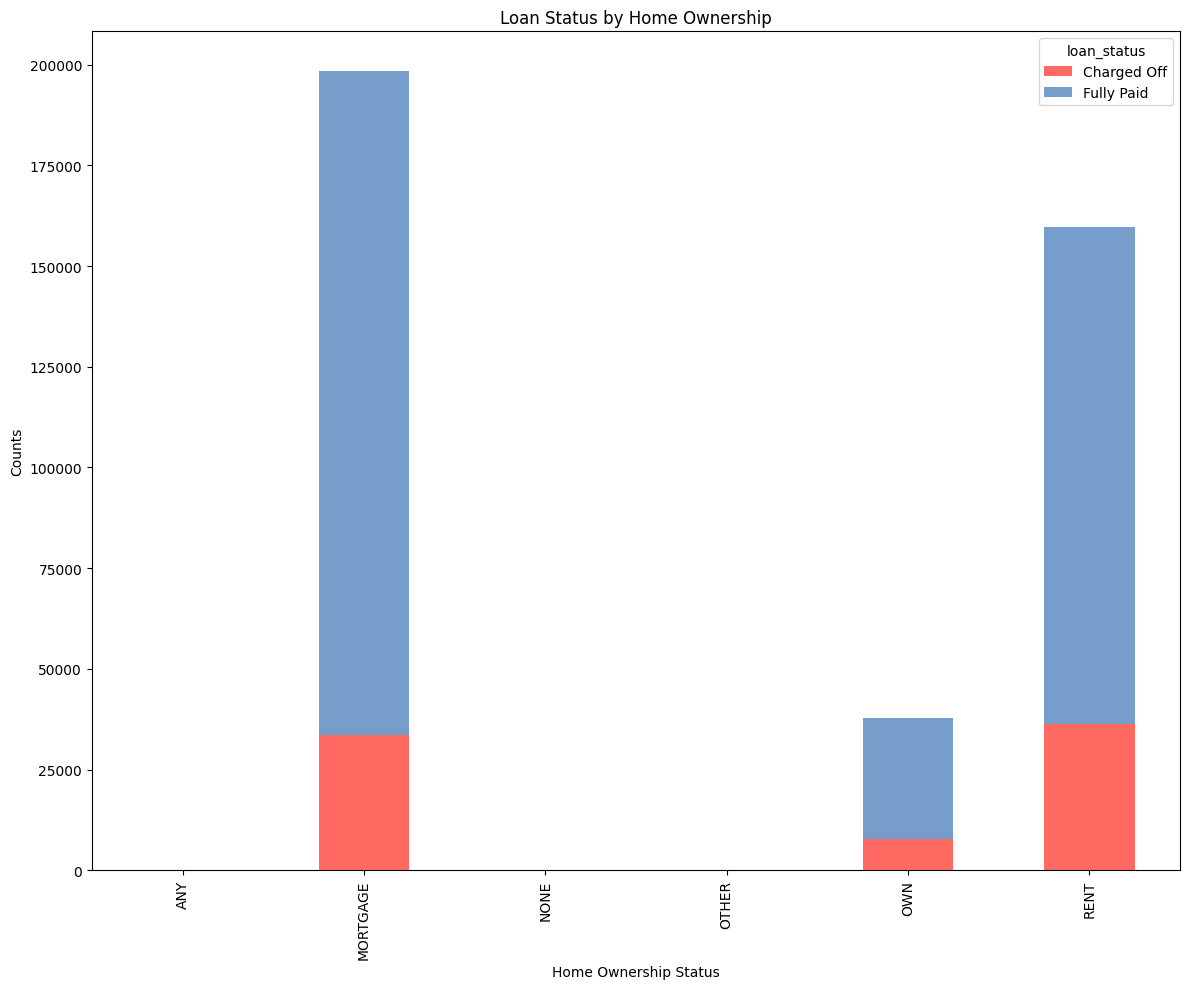

In [21]:
counts = pd.crosstab(df['home_ownership'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 10))
counts.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title("Loan Status by Home Ownership")
ax.set_xlabel("Home Ownership Status")
ax.set_ylabel("Counts")

# for container in ax.containers:
#     ax.bar_label(container, label_type='edge')

plt.tight_layout()
plt.show()

The values for (NONE & ANY) are negligible so I'll combine them into the OTHER option

In [22]:
df.loc[(df['home_ownership'] == 'ANY') | (df['home_ownership'] == 'NONE'), 'home_ownership'] = 'OTHER'
df.home_ownership.value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [23]:
df['term'] = df['term'].str.strip()

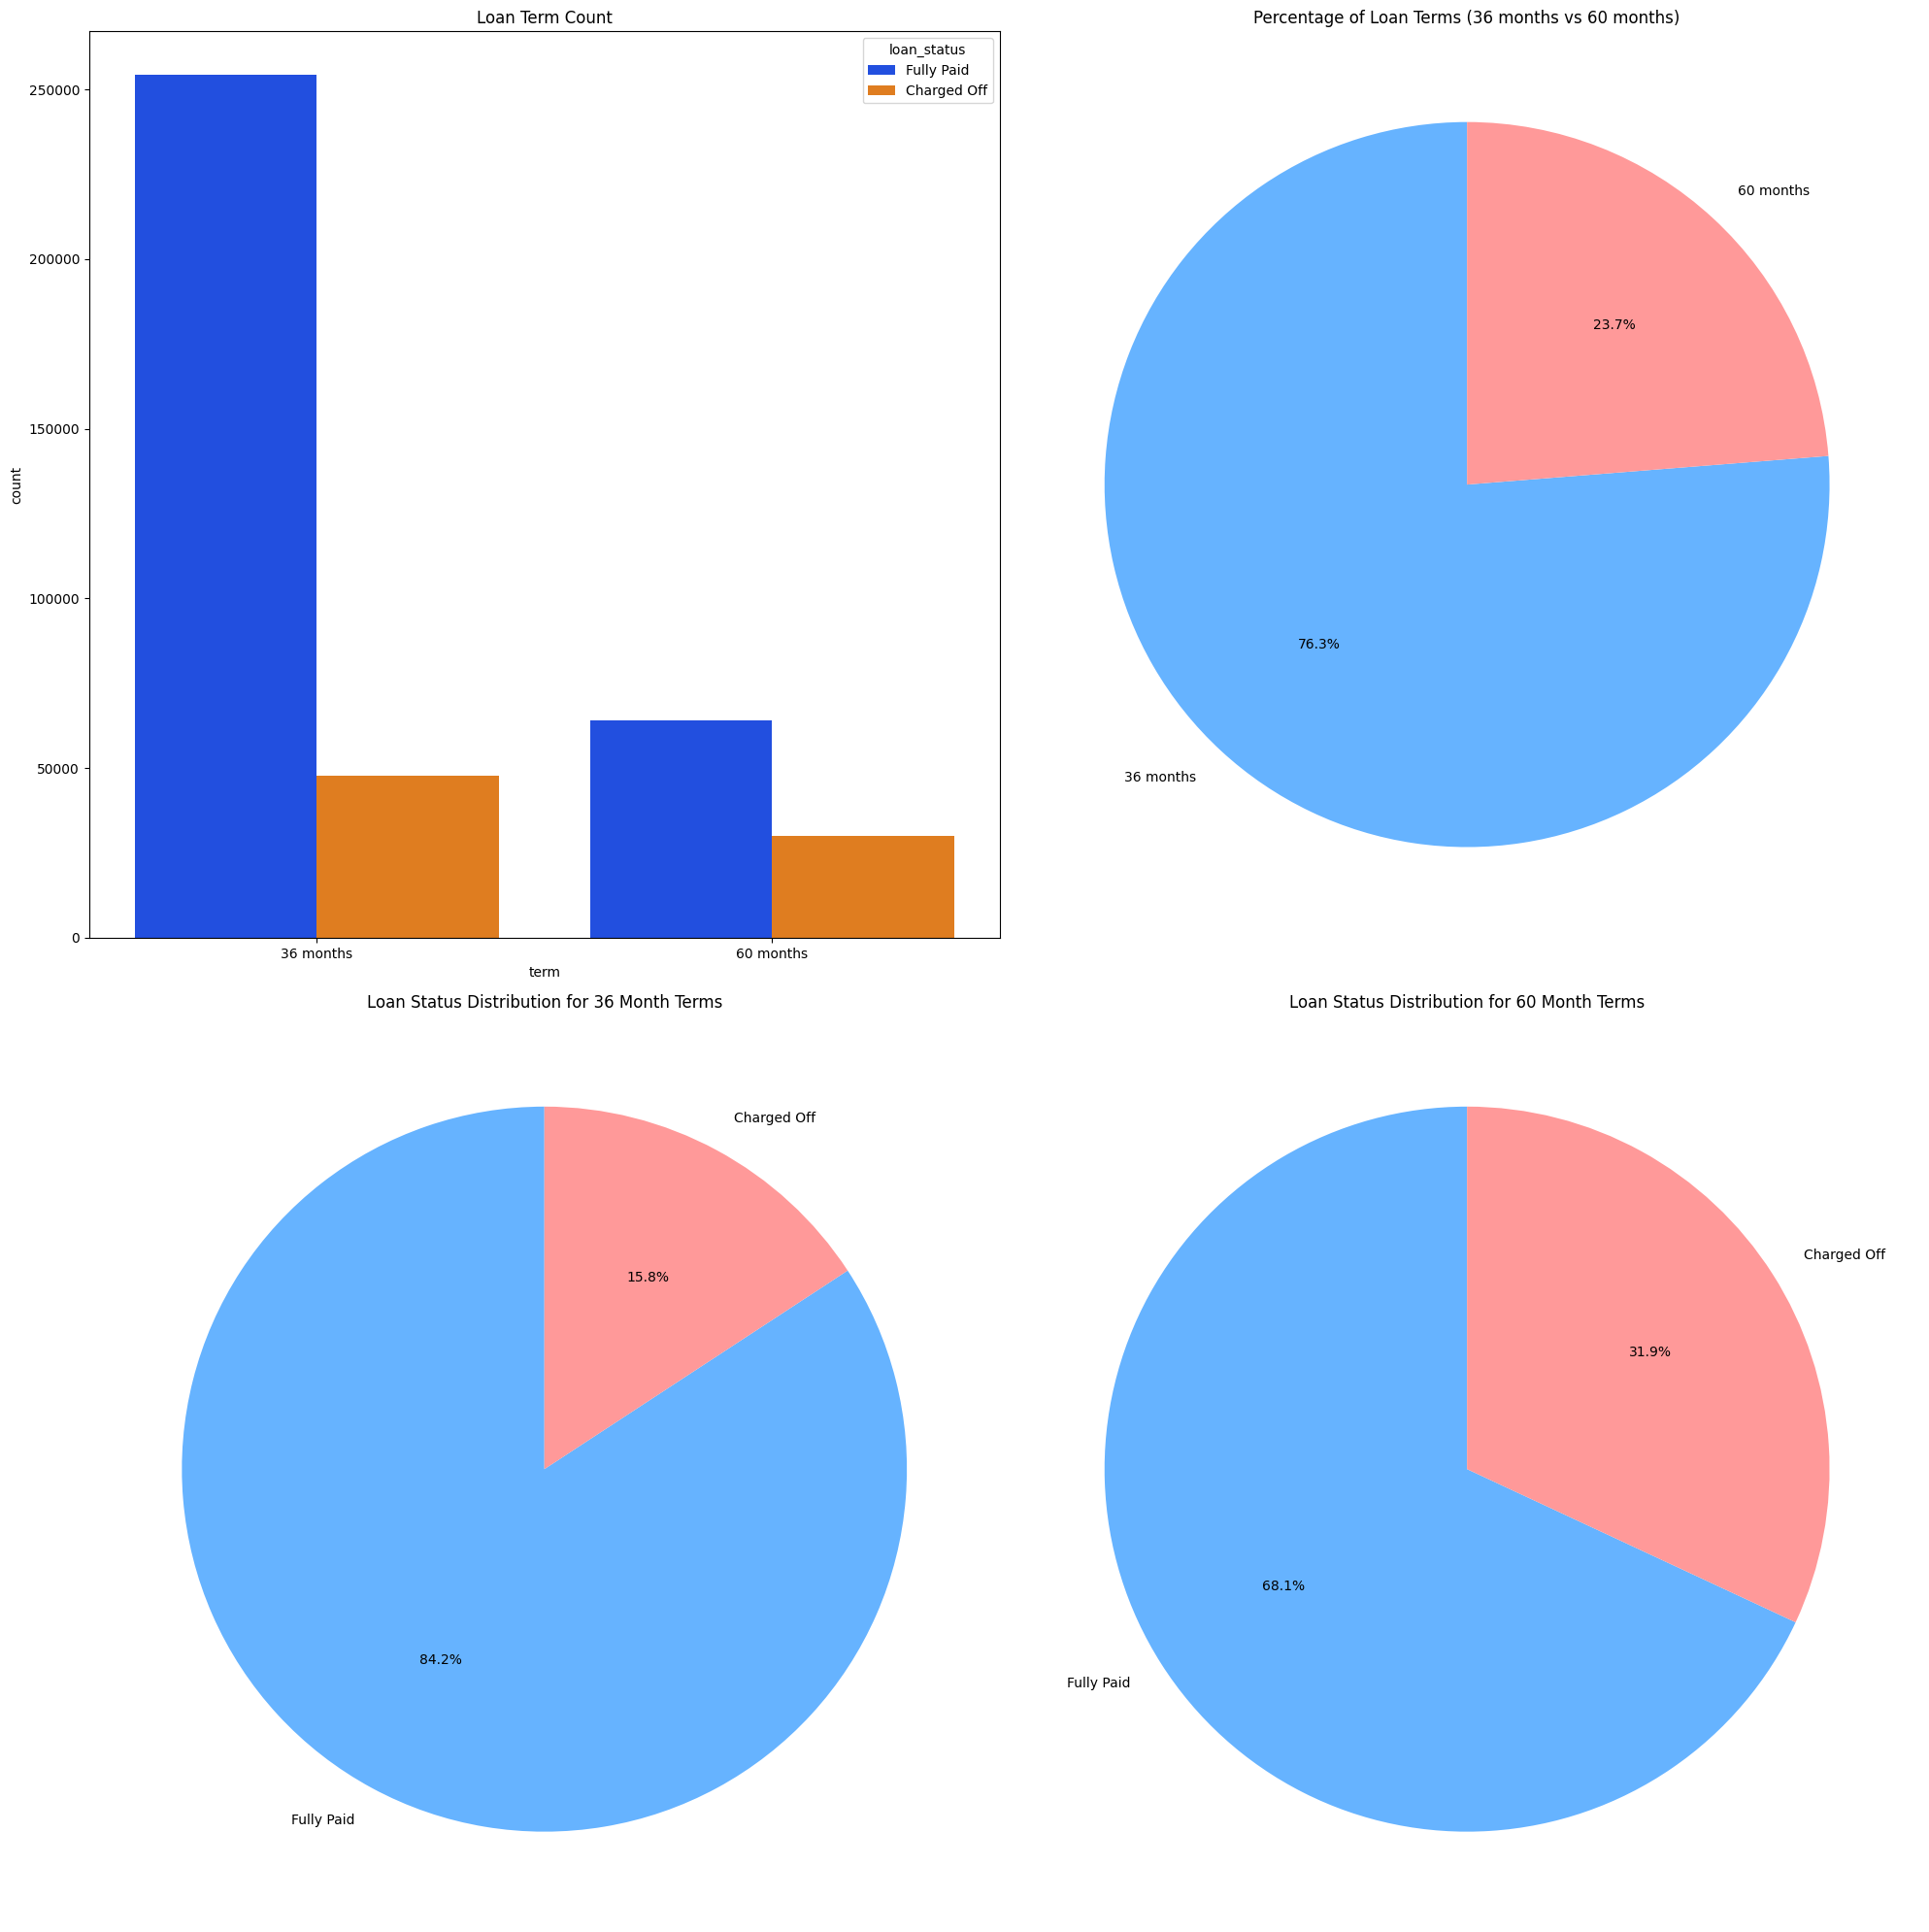

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))

sns.countplot(data=df, x=df['term'], ax=ax[0, 0], hue=df['loan_status'], palette='bright')
ax[0,0].set_title("Loan Term Count")

term_counts = df['term'].value_counts()
ax[0, 1].pie(term_counts, labels=term_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[0, 1].set_title('Percentage of Loan Terms (36 months vs 60 months)')

loan_status_36_months = df.loc[df['term'] =='36 months', 'loan_status'].value_counts()

ax[1, 0].pie(loan_status_36_months, labels=loan_status_36_months.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[1, 0].set_title('Loan Status Distribution for 36 Month Terms')

loan_status_60_months = df.loc[df['term'] =='60 months', 'loan_status'].value_counts()
ax[1, 1].pie(loan_status_60_months, labels=loan_status_60_months.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
ax[1, 1].set_title('Loan Status Distribution for 60 Month Terms')


plt.tight_layout()
plt.show()


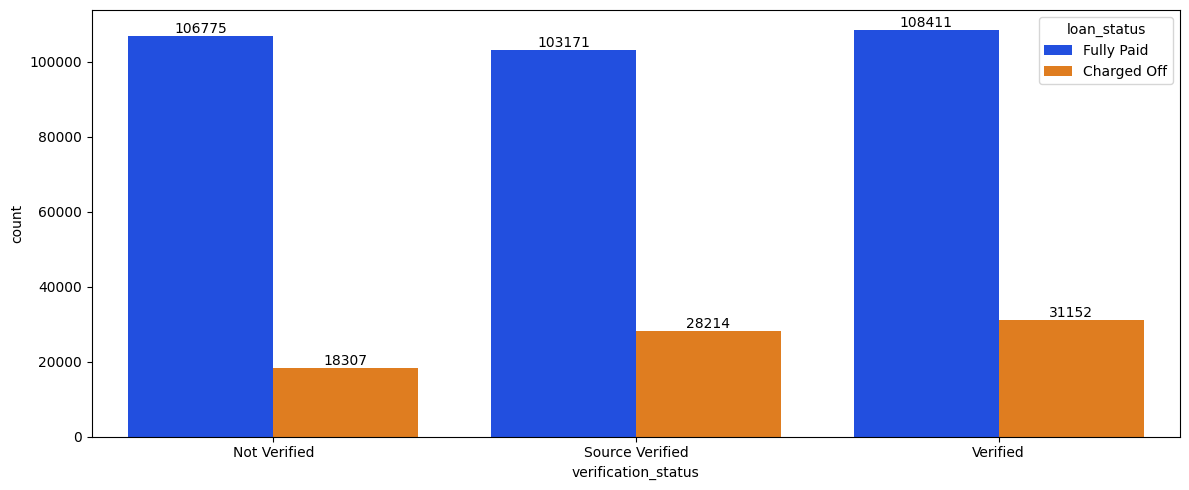

In [25]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(data=df, x=df['verification_status'], hue='loan_status', palette='bright')

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

In [ ]:
print(df['verification_status'].value_counts())
print('-------------------------------------------')
print(df.groupby('verification_status')['loan_status'].value_counts(normalize=True))

verification_status
Verified           139563
Source Verified    131385
Not Verified       125082
Name: count, dtype: int64
-------------------------------------------
verification_status  loan_status
Not Verified         Fully Paid     0.853640
                     Charged Off    0.146360
Source Verified      Fully Paid     0.785257
                     Charged Off    0.214743
Verified             Fully Paid     0.776789
                     Charged Off    0.223211
Name: proportion, dtype: float64


C:\Users\Olorunjuwon\AppData\Local\Temp\ipykernel_31336\988326441.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90)


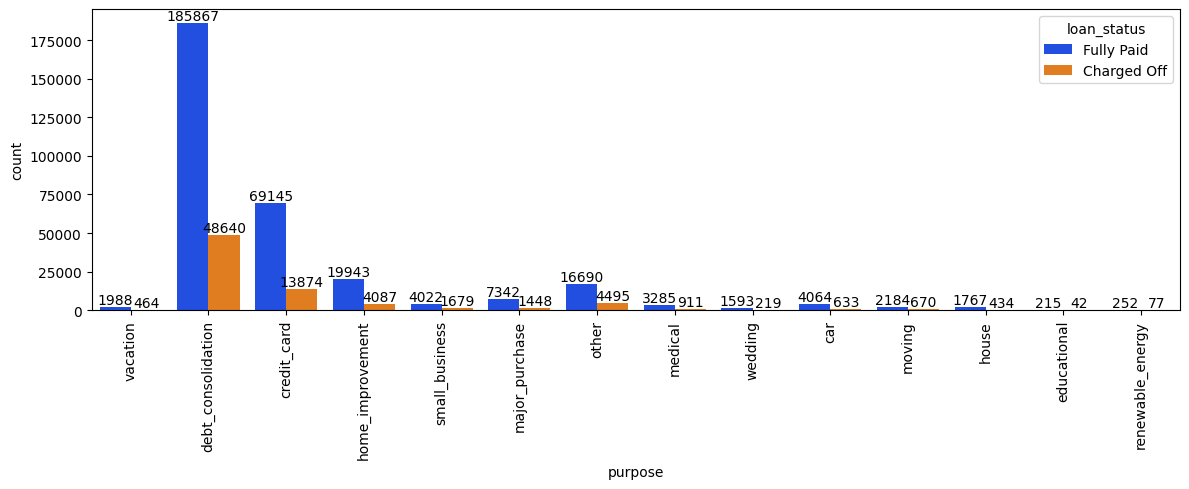

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
g = sns.countplot(data=df, x=df['purpose'], hue='loan_status', palette='bright')
g.set_xticklabels(g.get_xticklabels(), rotation=90)

for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.tight_layout()
plt.show()

In [28]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['issue_d'].describe()

count                           396030
mean     2014-02-02 15:57:58.045602560
min                2007-06-01 00:00:00
25%                2013-05-01 00:00:00
50%                2014-04-01 00:00:00
75%                2015-03-01 00:00:00
max                2016-12-01 00:00:00
Name: issue_d, dtype: object

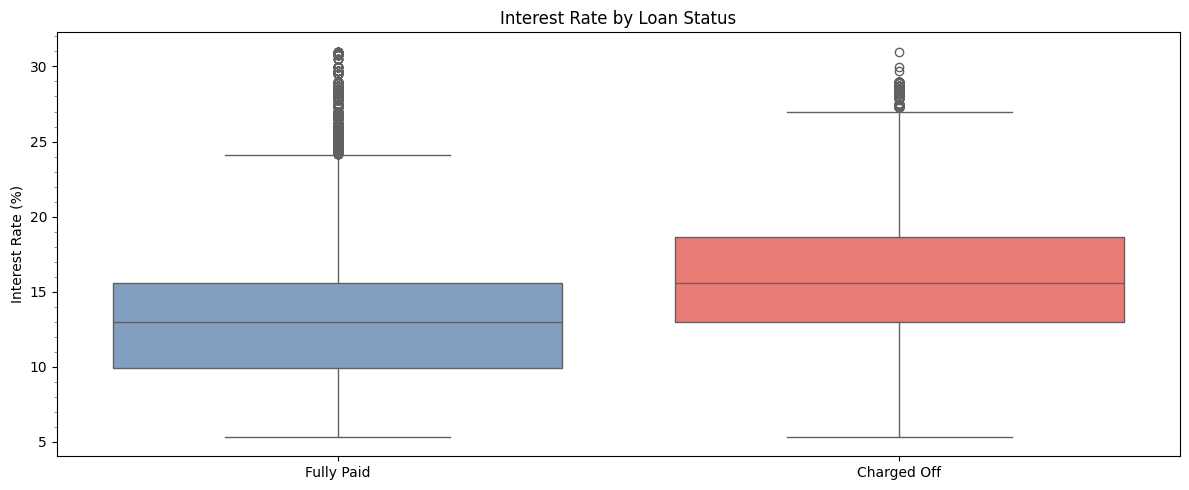

In [29]:
plt.figure(figsize=(12,5))
g = sns.boxplot(x='loan_status', y='int_rate', data=df, hue='loan_status', palette=['#779ECB', '#FF6961'])

g.yaxis.set_minor_locator(MultipleLocator(1))
g.tick_params(which='minor', length=2, color='gray')

plt.title("Interest Rate by Loan Status")
plt.xlabel('')
plt.ylabel('Interest Rate (%)')
plt.tight_layout()
plt.show()

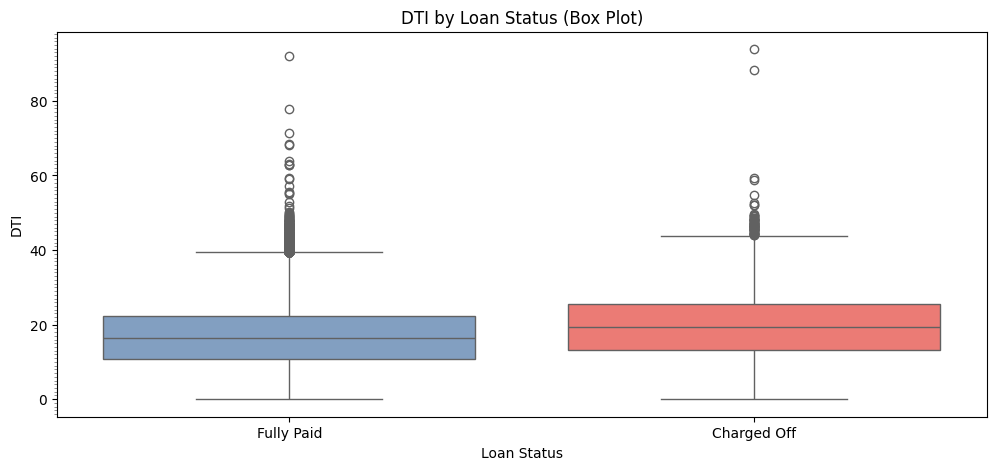

In [30]:
filtered_df = df[df['dti'] <= 100] 
plt.figure(figsize=(12, 5))
g = sns.boxplot(data=filtered_df, x='loan_status', y='dti', hue='loan_status', palette=['#779ECB', '#FF6961'])
g.yaxis.set_minor_locator(MultipleLocator(1))
g.tick_params(which='minor', length=2, color='gray')

plt.title('DTI by Loan Status (Box Plot)')
plt.xlabel('Loan Status'); plt.ylabel('DTI')
plt.show()


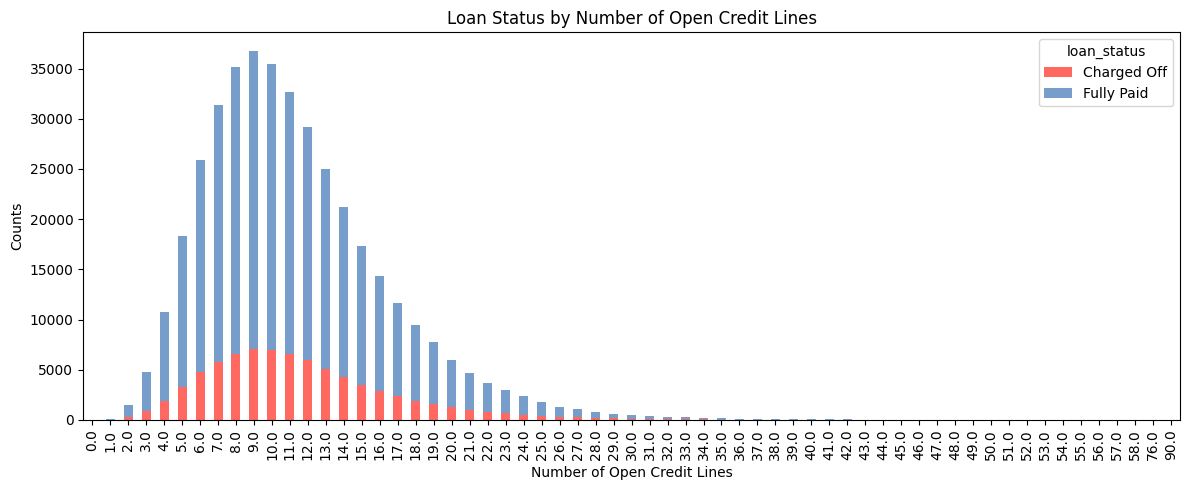

In [31]:
loan_status_by_open_credit_lines = pd.crosstab(df['open_acc'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_open_credit_lines.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Number of Open Credit Lines')
ax.set_xlabel('Number of Open Credit Lines')
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

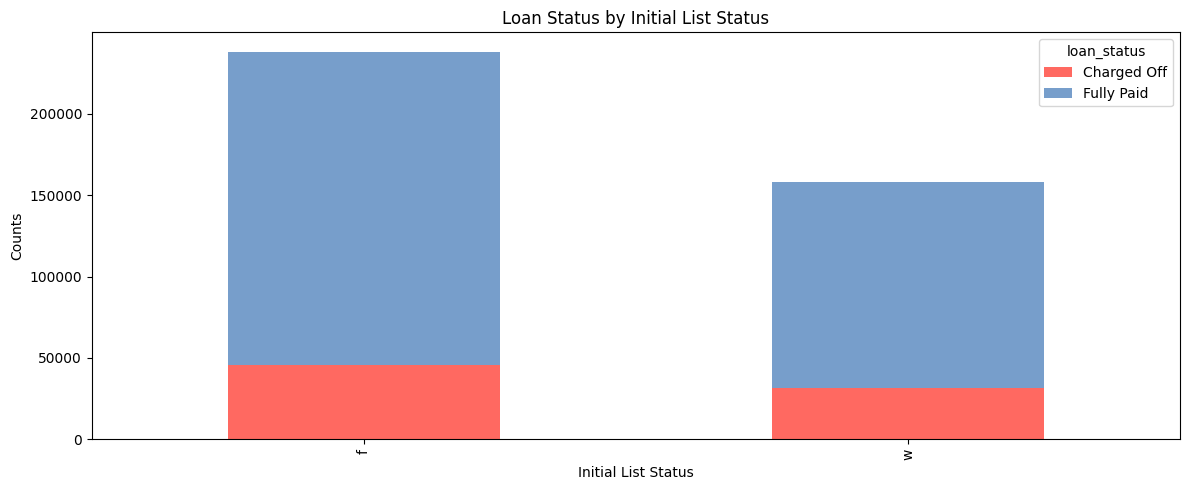

In [32]:
loan_status_by_initial_list_status = pd.crosstab(df['initial_list_status'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_initial_list_status.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Initial List Status')
ax.set_xlabel('Initial List Status')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

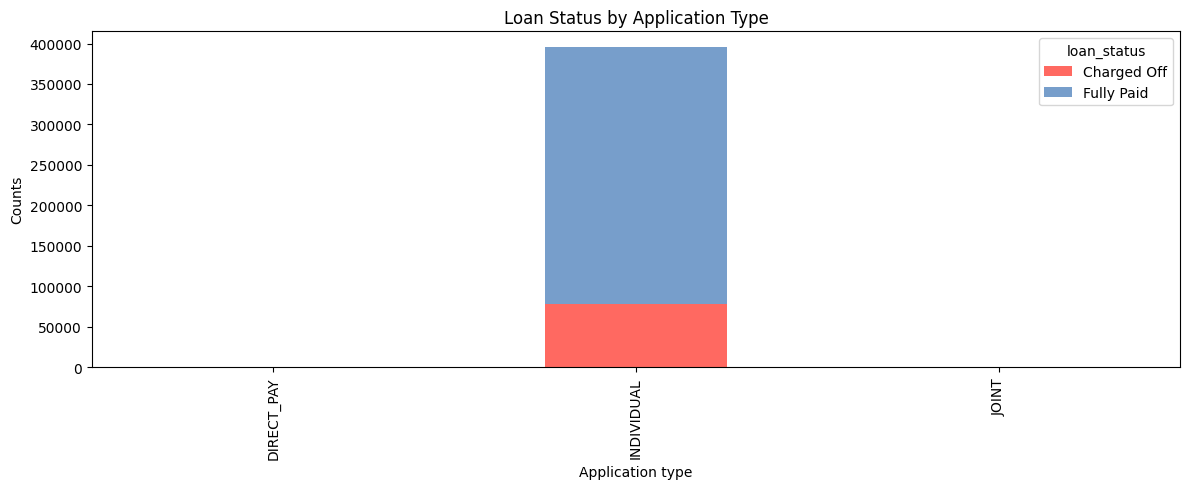

In [33]:
loan_status_by_initial_list_status = pd.crosstab(df['application_type'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_initial_list_status.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Application Type')
ax.set_xlabel('Application type')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

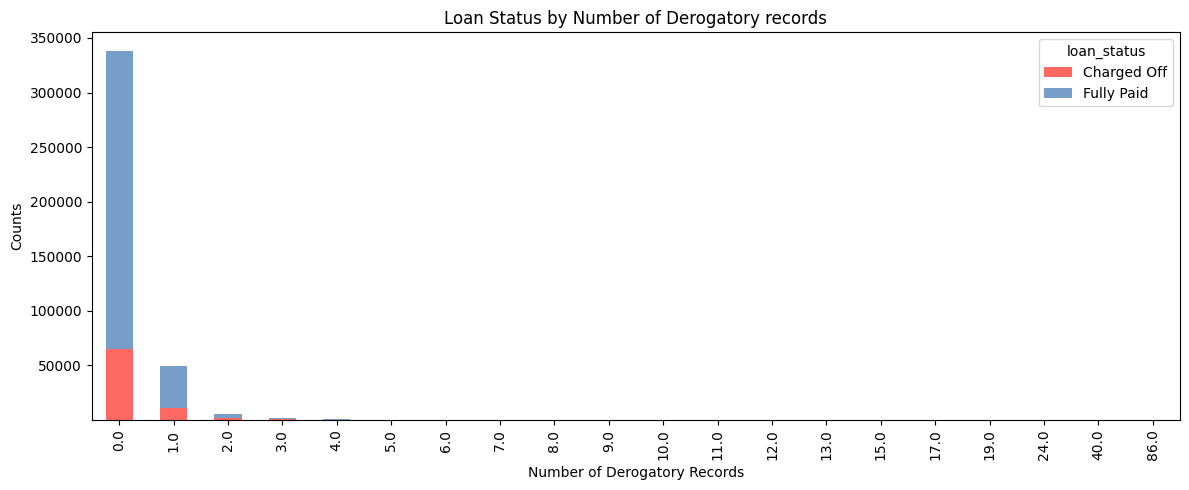

In [34]:
loan_status_by_number_of_derogatory_records = pd.crosstab(df['pub_rec'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_number_of_derogatory_records.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Number of Derogatory records')
ax.set_xlabel('Number of Derogatory Records')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

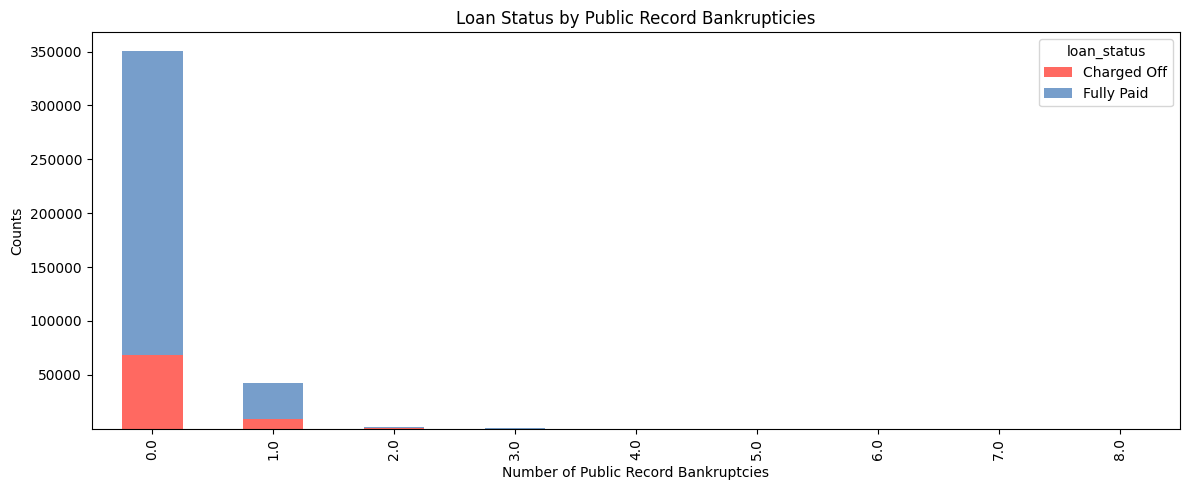

In [35]:
loan_status_by_number_of_record_bankruptcies = pd.crosstab(df['pub_rec_bankruptcies'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_number_of_record_bankruptcies.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Public Record Bankrupticies')
ax.set_xlabel('Number of Public Record Bankruptcies')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

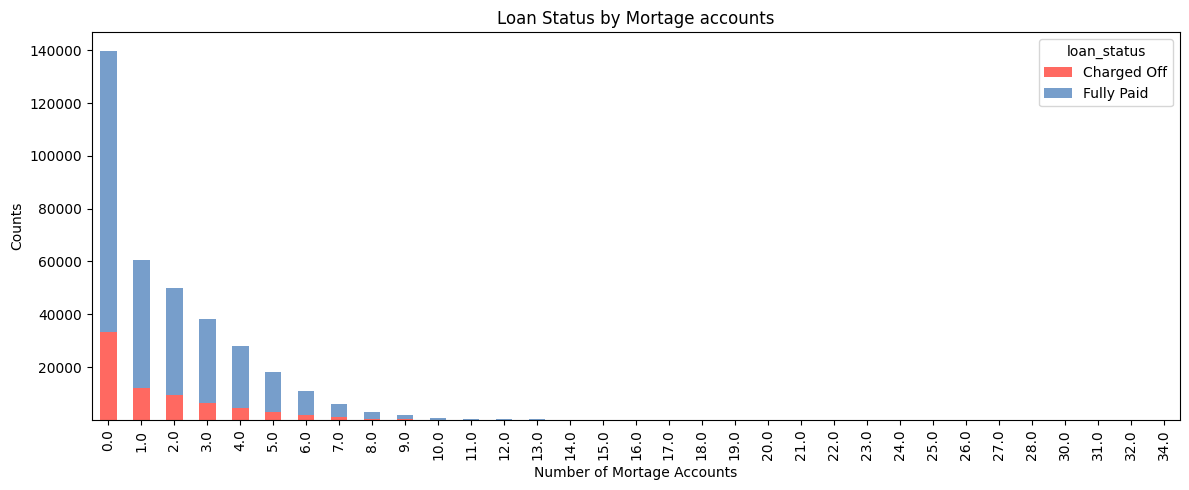

In [36]:
loan_status_by_number_of_mortage_accounts = pd.crosstab(df['mort_acc'], df['loan_status'])
fig, ax = plt.subplots(figsize=(12, 5))
loan_status_by_number_of_mortage_accounts.plot(kind='bar', stacked=True, ax=ax, color=['#FF6961', '#779ECB'])
ax.set_title('Loan Status by Mortage accounts')
ax.set_xlabel('Number of Mortage Accounts')
ax.set_ylabel('Counts')
plt.tight_layout()
plt.show()

In [37]:
df['pub_rec'] = df['pub_rec'].where(df['pub_rec'].isna(), (df['pub_rec'] > 0).astype(int))
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].where(df['pub_rec_bankruptcies'].isna(), (df['pub_rec_bankruptcies'] > 0).astype(int))
df['mort_acc'] = df['mort_acc'].where(df['mort_acc'].isna(), (df['mort_acc'] > 0).astype(int))

In [38]:
df['annual_inc'].describe()

count    3.960300e+05
mean     7.420318e+04
std      6.163762e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.400000e+04
75%      9.000000e+04
max      8.706582e+06
Name: annual_inc, dtype: float64

In [39]:
print(df.emp_title.isna().sum())
print(df.emp_title.nunique())

# Top 20 jobs and their counts
print(df['emp_title'].value_counts()[:20])

22927
173105
emp_title
Teacher                     4389
Manager                     4250
Registered Nurse            1856
RN                          1846
Supervisor                  1830
Sales                       1638
Project Manager             1505
Owner                       1410
Driver                      1339
Office Manager              1218
manager                     1145
Director                    1089
General Manager             1074
Engineer                     995
teacher                      962
driver                       882
Vice President               857
Operations Manager           763
Administrative Assistant     756
Accountant                   748
Name: count, dtype: int64


In [40]:
df.loc[df['annual_inc'] >= 1000000, 'loan_status'].value_counts()

loan_status
Fully Paid     65
Charged Off    10
Name: count, dtype: int64

### Data Pre-Processing

In [41]:
print(f"Shape of the data: {df.shape}")

Shape of the data: (396030, 27)


In [42]:
for col in df.columns: 
    if df[col].isna().sum() != 0:
        missing = df[col].isna().sum()
        per_missing = (missing / df.shape [0]) * 100

        print(f"Number of missing values in  {col}: {missing}")
        print(f"Percentage of missing values: {per_missing:.3f}%")

Number of missing values in  emp_title: 22927
Percentage of missing values: 5.789%
Number of missing values in  emp_length: 18301
Percentage of missing values: 4.621%
Number of missing values in  title: 1756
Percentage of missing values: 0.443%
Number of missing values in  revol_util: 276
Percentage of missing values: 0.070%
Number of missing values in  mort_acc: 37795
Percentage of missing values: 9.543%
Number of missing values in  pub_rec_bankruptcies: 535
Percentage of missing values: 0.135%


In [43]:
print(f"Number of unique values in 'emp_title': {df['emp_title'].nunique()}")

Number of unique values in 'emp_title': 173105


The are too many unique values in the 'emp_title' feature to try to convert to a dummy value. So it will be removed

In [44]:
df.drop('emp_title', axis=1, inplace=True)

In [45]:
print(f"Number of unique values in 'emp_length: {df['emp_length'].nunique()}")
print(f"Unique values in 'emp_length': {df['emp_length'].unique()}")


Number of unique values in 'emp_length: 11
Unique values in 'emp_length': ['10+ years' '4 years' '< 1 year' '6 years' '9 years' '2 years' '3 years'
 '8 years' '7 years' '5 years' '1 year' nan]


In [46]:
for year in df['emp_length'].unique():
    print(f"{year} in this position:")
    counts = df[df['emp_length'] == year]['loan_status'].value_counts(normalize=True).round(2)
    print(counts)
    print('-----------------------------------------')

10+ years in this position:
loan_status
Fully Paid     0.82
Charged Off    0.18
Name: proportion, dtype: float64
-----------------------------------------
4 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
< 1 year in this position:
loan_status
Fully Paid     0.79
Charged Off    0.21
Name: proportion, dtype: float64
-----------------------------------------
6 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
9 years in this position:
loan_status
Fully Paid     0.8
Charged Off    0.2
Name: proportion, dtype: float64
-----------------------------------------
2 years in this position:
loan_status
Fully Paid     0.81
Charged Off    0.19
Name: proportion, dtype: float64
-----------------------------------------
3 years in this position:
loan_status
Fully Paid     0.8
Charged Off    0.2
Name:

Default rates are comparable across all employment lengths, so it can be removed.

In [47]:
df.drop('emp_length', axis=1, inplace=True)

In [48]:
print(df['title'].value_counts().head())
print('--------------------------------')
print(df['purpose'].value_counts().head())

title
Debt consolidation         152472
Credit card refinancing     51487
Home improvement            15264
Other                       12930
Debt Consolidation          11608
Name: count, dtype: int64
--------------------------------
purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
Name: count, dtype: int64


The title column is essentially a string subcategory/description of the purpose column. so we drop it

In [49]:
df.drop('title', axis=1, inplace=True)

In [50]:
df['mort_acc'].value_counts()

mort_acc
1.0    218458
0.0    139777
Name: count, dtype: int64

In [51]:
df['mort_acc'].isna().sum()

np.int64(37795)

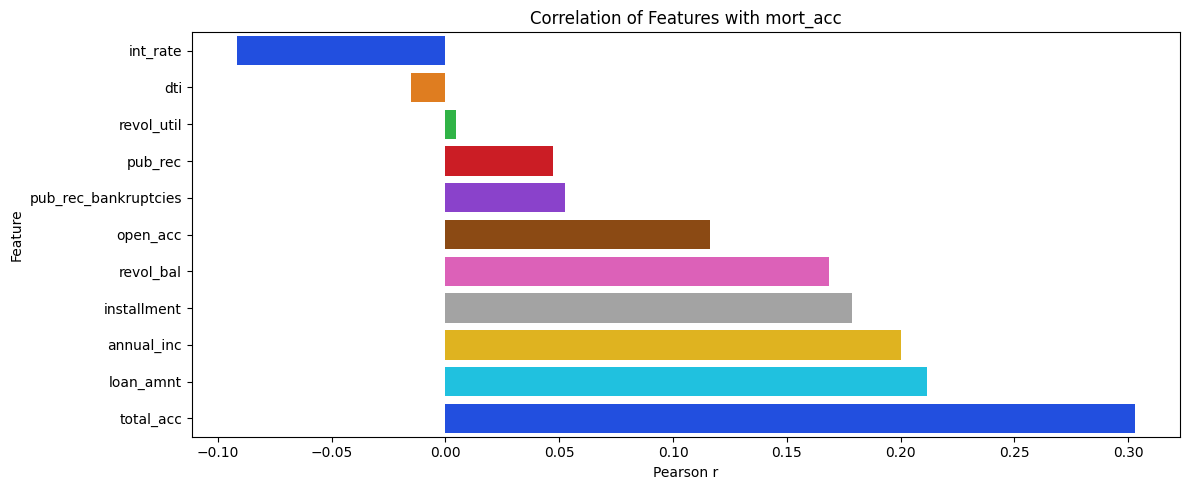

In [52]:
corr_series = (
    df.corr(numeric_only=True)['mort_acc'].drop('mort_acc').sort_values()
)

plt.figure(figsize=(12, 5))
sns.barplot(
    x=corr_series.values,
    y=corr_series.index,
    hue=corr_series.index,
    palette='bright'
)

plt.title("Correlation of Features with mort_acc")
plt.xlabel("Pearson r")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [53]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()
total_acc_avg = total_acc_avg.round()
print(total_acc_avg)

total_acc
2.0      0.0
3.0      0.0
4.0      0.0
5.0      0.0
6.0      0.0
        ... 
124.0    1.0
129.0    1.0
135.0    1.0
150.0    1.0
151.0    0.0
Name: mort_acc, Length: 118, dtype: float64


In [54]:
df['mort_acc'] = df['mort_acc'].fillna(df['total_acc'].map(total_acc_avg))
df['mort_acc'] = df['mort_acc'].astype(int)
df['pub_rec'] = df['pub_rec'].astype(int)

In [55]:
df['mort_acc'].value_counts()

mort_acc
1    242794
0    153236
Name: count, dtype: int64

revol_util & pub_rec_bankrupticies missing values in total amount to 0.205% of the data so we can remove the records with those missing values

In [56]:
df.dropna(inplace=True)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [57]:
df.shape

(395219, 24)

Now well deal with encoding the categorical data

In [58]:
df.select_dtypes(include=['object', 'category']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [59]:
#term
df['term'].unique()

array(['36 months', '60 months'], dtype=object)

In [60]:
df['term'] = df['term'].str.extract(r'(\d+)').astype(int)
print(df['term'].unique())

[36 60]


In [61]:
print(df['grade'].unique())
print(df['sub_grade'].unique())

['B', 'A', 'C', 'E', 'D', 'F', 'G']
Categories (7, object): ['A' < 'B' < 'C' < 'D' < 'E' < 'F' < 'G']
['B4', 'B5', 'B3', 'A2', 'C5', ..., 'F3', 'G5', 'G4', 'F2', 'G3']
Length: 35
Categories (35, object): ['A1' < 'A2' < 'A3' < 'A4' ... 'G2' < 'G3' < 'G4' < 'G5']


sub_grade gives finer detial (A1 to G5) i.e. each grade has 5 subgrades. So we will drop the grade feature. 

In [62]:
df.drop('grade', axis=1, inplace=True)

In [63]:
desired_order = [
    'A1','A2','A3','A4','A5',
    'B1','B2','B3','B4','B5',
    'C1','C2','C3','C4','C5',
    'D1','D2','D3','D4','D5',
    'E1','E2','E3','E4','E5',
    'F1','F2','F3','F4','F5',
    'G1','G2','G3','G4','G5'
]

le = LabelEncoder().fit(desired_order)
df['sub_grade_enc'] = le.transform(df['sub_grade'])

In [64]:
for i, cat in enumerate(le.classes_):
    print(cat, '→', i)

A1 → 0
A2 → 1
A3 → 2
A4 → 3
A5 → 4
B1 → 5
B2 → 6
B3 → 7
B4 → 8
B5 → 9
C1 → 10
C2 → 11
C3 → 12
C4 → 13
C5 → 14
D1 → 15
D2 → 16
D3 → 17
D4 → 18
D5 → 19
E1 → 20
E2 → 21
E3 → 22
E4 → 23
E5 → 24
F1 → 25
F2 → 26
F3 → 27
F4 → 28
F5 → 29
G1 → 30
G2 → 31
G3 → 32
G4 → 33
G5 → 34


In [65]:
df.drop('sub_grade', axis=1, inplace=True)

In [66]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,sub_grade_enc
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,2015-01-01,Fully Paid,vacation,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0,0,"0174 Michelle Gateway\nMendozaberg, OK 22690",8
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,2015-01-01,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,1,0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",9
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,2015-01-01,Fully Paid,credit_card,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0,0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",7
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,2014-11-01,Fully Paid,credit_card,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0,0,"823 Reid Ford\nDelacruzside, MA 00813",1
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,2013-04-01,Charged Off,credit_card,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1,0,"679 Luna Roads\nGreggshire, VA 11650",14


In [67]:
dummies = ['application_type', 'home_ownership', 'initial_list_status', 'purpose', 'verification_status']

ohe = OneHotEncoder(drop='first', sparse_output=False, dtype=int)

encoded_array = ohe.fit_transform(df[dummies])
encoded_cols = ohe.get_feature_names_out(dummies)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_cols, index=df.index)

df = pd.concat([df.drop(columns=dummies), encoded_df], axis=1)

In [68]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,Fully Paid,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,0,0,"0174 Michelle Gateway\nMendozaberg, OK 22690",8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,Fully Paid,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,1,0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,Fully Paid,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,0,0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,Fully Paid,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,0,0,"823 Reid Ford\nDelacruzside, MA 00813",1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,Charged Off,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,1,0,"679 Luna Roads\nGreggshire, VA 11650",14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [69]:
df['address'].head()

0       0174 Michelle Gateway\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3              823 Reid Ford\nDelacruzside, MA 00813
4               679 Luna Roads\nGreggshire, VA 11650
Name: address, dtype: object

In [70]:
df['zip_code'] = df['address'].str.extract(r'(\d{5})$')

In [71]:
df['zip_code'].nunique()

10

In [72]:
zip_array = ohe.fit_transform(df[['zip_code']])
zip_cols = ohe.get_feature_names_out(['zip_code'])
zip_dummies = pd.DataFrame(zip_array, columns=zip_cols, index=df.index)

df = pd.concat([df.drop(columns=['zip_code']), zip_dummies], axis=1)

In [73]:
df.drop('address', axis=1, inplace=True)

In [74]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,Fully Paid,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,0,0,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,Fully Paid,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,1,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,Fully Paid,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,0,0,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,Fully Paid,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,Charged Off,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,1,0,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0


In [75]:
df['issue_d'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2014-11-01
4   2013-04-01
Name: issue_d, dtype: datetime64[ns]

In [76]:
df

,loan_amnt,term,int_rate,installment,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,sub_grade_enc,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,verification_status_Source Verified,verification_status_Verified,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700
0,10000.0,36,11.44,329.48,117000.0,2015-01-01,Fully Paid,26.24,Jun-1990,16.0,0,36369.0,41.8,25.0,0,0,8,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,65000.0,2015-01-01,Fully Paid,22.05,Jul-2004,17.0,0,20131.0,53.3,27.0,1,0,9,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,43057.0,2015-01-01,Fully Paid,12.79,Aug-2007,13.0,0,11987.0,92.2,26.0,0,0,7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,54000.0,2014-11-01,Fully Paid,2.60,Sep-2006,6.0,0,5472.0,21.5,13.0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,55000.0,2013-04-01,Charged Off,33.95,Mar-1999,13.0,0,24584.0,69.8,43.0,1,0,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,40000.0,2015-10-01,Fully Paid,15.63,Nov-2004,6.0,0,1990.0,34.3,23.0,0,0,8,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
396026,21000.0,36,12.29,700.42,110000.0,2015-02-01,Fully Paid,21.45,Feb-2006,6.0,0,43263.0,95.7,8.0,1,0,10,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,56500.0,2013-10-01,Fully Paid,17.56,Mar-1997,15.0,0,32704.0,66.9,23.0,0,0,5,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
396028,21000.0,60,15.31,503.02,64000.0,2012-08-01,Fully Paid,15.88,Nov-1990,9.0,0,15704.0,53.8,20.0,1,0,11,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
